# Exploratory data analysis (EDA) 

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 

## Merge financial ratios with sectors into one DataFrame

In [22]:
financial_ratios = pd.read_csv('financial_ratios.csv')

In [23]:
sectors = pd.read_csv('sectors.csv')

In [24]:
financial_ratios.set_index('tickers', inplace = True)
sectors.set_index('Symbol', inplace = True)

In [34]:
sectors.drop('Unnamed: 0', axis = 1, inplace = True)

In [35]:
sectors.rename(columns = {'Symbol':'tickers'}, inplace = True)

In [38]:
company_details = sectors.join(financial_ratios)

In [39]:
company_details

,GICS Sector,GICS Sub-Industry,debt_to_assets,debt_to_equity,profit_margin
Symbol,,,,,
MMM,Industrials,Industrial Conglomerates,0.476455,2.114479,0.156534
ABT,Health Care,Health Care Equipment,0.278315,0.607759,0.104963
ABBV,Health Care,Pharmaceuticals,0.748785,8.165443,0.247702
ABMD,Health Care,Health Care Equipment,0.000000,0.000000,0.258846
ACN,Information Technology,IT Consulting & Other Services,0.094003,0.205024,0.115231
...,...,...,...,...,...
YUM,Consumer Discretionary,Restaurants,2.154273,1.405813,0.189184
ZBRA,Information Technology,Electronic Equipment & Instruments,0.298450,0.764546,0.109418
ZBH,Health Care,Health Care Equipment,0.333419,0.663136,0.048392


### 

## Compute daily returns from pricing information

In [78]:
company_prices = pd.read_csv('sp500_2010_2019.csv')

In [79]:
company_prices.rename(columns = {'Unnamed: 0':'date'}, inplace = True)

In [80]:
company_prices.set_index('date', inplace = True)

In [81]:
company_returns_all = company_prices.pct_change()

In [82]:
company_returns_all

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.006264,-0.008079,NaN,-0.024027,0.006180,0.001770,0.016446,0.001031,-0.005944,-0.010241,...,0.060819,-0.011860,0.001159,-0.012608,NaN,-0.003420,-0.001744,0.031656,0.035259,NaN
2010-01-06,0.014182,0.005553,NaN,-0.015240,0.010631,-0.005300,-0.002122,-0.014418,0.008719,-0.010347,...,-0.013117,0.001920,-0.009259,-0.006784,NaN,-0.007149,-0.007687,-0.000323,0.086957,NaN
2010-01-07,0.000717,0.008284,NaN,0.000000,-0.000935,-0.023979,-0.019405,-0.010449,-0.000247,0.000747,...,0.021356,-0.004312,0.004673,-0.010044,NaN,-0.000288,-0.025000,0.022940,0.112000,NaN
2010-01-08,0.007046,0.005112,NaN,-0.020238,-0.003978,-0.008189,-0.005422,-0.004224,0.003953,0.028358,...,-0.007165,0.000481,-0.003488,0.014610,NaN,0.000288,-0.003250,-0.021004,-0.016187,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.010030,-0.000801,-0.004432,0.010913,0.003700,-0.001358,0.002098,0.023757,0.003751,-0.003027,...,-0.005634,0.003888,0.000535,-0.004146,-0.003927,0.005210,-0.009348,-0.002446,0.003701,0.004155
2019-12-26,-0.000509,0.000000,-0.000223,-0.007487,0.002079,0.001360,0.004732,0.001934,-0.008096,0.008603,...,0.010757,-0.001114,0.002944,0.001929,-0.000509,0.014552,0.000354,-0.002187,0.002523,0.000828
2019-12-27,0.003794,0.001375,-0.007013,-0.010175,0.000802,0.005009,-0.001238,-0.009650,-0.005776,0.002509,...,-0.008018,0.005256,-0.004536,-0.002635,0.003053,0.001081,0.006210,-0.001929,-0.003097,0.001654


### 

## Isolate the returns from 2016 to 2018, which will be used for clustering

In [118]:
company_returns = company_returns_all.loc['2016-01-04':'2018-12-31']

In [119]:
company_returns

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-0.025358,-0.044088,-0.027515,-0.055826,-0.025550,-0.028158,-0.020971,-0.034843,0.011494,-0.014629,...,-0.006070,-0.005848,-0.031044,-0.024910,-0.011507,-0.011499,-0.045370,-0.007603,-0.021612,-0.013564
2016-01-05,0.004359,-0.000233,-0.004166,-0.002816,0.005205,-0.012759,0.004023,-0.007220,-0.006831,0.013786,...,0.018904,0.010084,-0.001942,0.014847,-0.000277,-0.002493,-0.025117,0.020823,-0.010857,0.015655
2016-01-06,-0.020141,-0.008388,0.000174,0.003529,-0.001954,-0.009424,-0.014295,-0.089091,-0.026455,-0.034519,...,-0.051805,0.010538,-0.012646,-0.018287,-0.012476,-0.007080,-0.039957,0.004330,-0.029145,0.000208
2016-01-07,-0.024362,-0.023966,-0.002963,-0.039625,-0.029366,-0.014134,-0.020984,-0.091816,0.011073,-0.024919,...,-0.094070,0.003842,-0.027586,-0.039448,-0.025828,-0.034116,-0.045316,-0.022993,-0.030019,-0.030404
2016-01-08,-0.003405,-0.020944,-0.027268,0.032471,-0.009681,-0.015440,-0.014140,-0.059341,-0.021971,0.014444,...,-0.040704,-0.010935,-0.028369,-0.020534,-0.009510,-0.013607,-0.002693,-0.004217,-0.011254,-0.014605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.027918,-0.025420,-0.008950,-0.031727,-0.025729,-0.040567,-0.017433,-0.016539,-0.016445,-0.043599,...,-0.014988,-0.045187,-0.021211,-0.027481,-0.032472,-0.012707,-0.022906,-0.021634,-0.014081,-0.029383
2018-12-26,0.042772,0.061928,0.057985,0.093781,0.039949,0.055240,0.086713,0.075075,0.041029,0.033285,...,0.078470,0.019753,0.041226,0.075060,0.047084,0.034130,0.067320,0.049265,0.051935,0.045913
2018-12-27,0.023838,0.014507,0.009771,0.026769,0.010071,0.013356,0.009823,-0.022905,-0.002193,0.000700,...,-0.011186,0.008475,-0.001015,-0.010796,0.016804,0.010779,0.018555,-0.000686,-0.001234,0.017004


### 

## EDA

Inspect:
- company_details
- company_returns

### 

### Company details

In [87]:
company_details.isnull().sum()

GICS Sector           0
GICS Sub-Industry     0
debt_to_assets       10
debt_to_equity        9
profit_margin         5
dtype: int64

In [88]:
company_details[company_details['debt_to_assets'].isnull()]

,GICS Sector,GICS Sub-Industry,debt_to_assets,debt_to_equity,profit_margin
Symbol,,,,,
BRK.B,Financials,Multi-Sector Holdings,NaN,NaN,NaN
BF.B,Consumer Staples,Distillers & Vintners,NaN,NaN,NaN
FTNT,Information Technology,Systems Software,NaN,NaN,0.174617
HBI,Consumer Discretionary,"Apparel, Accessories & Luxury Goods",NaN,NaN,NaN
HCA,Health Care,Health Care Facilities,NaN,NaN,NaN
IEX,Industrials,Industrial Machinery,NaN,NaN,NaN
ISRG,Health Care,Health Care Equipment,NaN,NaN,0.244509
MDLZ,Consumer Staples,Packaged Foods & Meats,NaN,NaN,0.117308
MNST,Consumer Staples,Soft Drinks,NaN,NaN,0.260645


### 

#### Drop companies that do not have ratio information. There are only 10 companies in question.

In [90]:
company_details = company_details.dropna()

In [91]:
company_details.isnull().sum()

GICS Sector          0
GICS Sub-Industry    0
debt_to_assets       0
debt_to_equity       0
profit_margin        0
dtype: int64

### 

#### Inspect remaining ratios

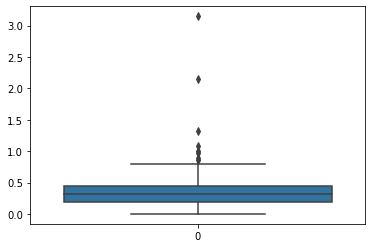

In [95]:
sns.boxplot(data = company_details['debt_to_assets'])
plt.show()

In [96]:
company_details[company_details['debt_to_assets'] > 1.5]

,GICS Sector,GICS Sub-Industry,debt_to_assets,debt_to_equity,profit_margin
Symbol,,,,,
DPZ,Consumer Discretionary,Restaurants,3.147763,1.273655,0.119842
YUM,Consumer Discretionary,Restaurants,2.154273,1.405813,0.189184


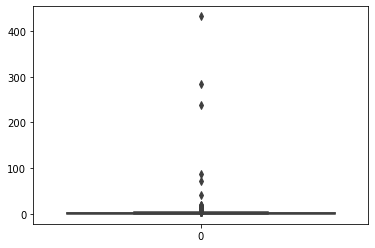

In [97]:
sns.boxplot(data = company_details['debt_to_equity'])
plt.show()

In [98]:
company_details[company_details['debt_to_equity'] > 50]

,GICS Sector,GICS Sub-Industry,debt_to_assets,debt_to_equity,profit_margin
Symbol,,,,,
AAL,Industrials,Airlines,0.557446,283.423729,0.255584
CL,Consumer Staples,Household Products,0.564254,72.504274,0.166502
KMB,Consumer Staples,Household Products,0.515409,238.696970,0.124954
NLOK,Information Technology,Application Software,0.558759,432.200000,1.317961
WU,Information Technology,Data Processing & Outsourced Services,0.396369,87.888608,0.199977


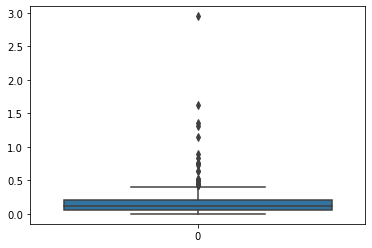

In [99]:
sns.boxplot(data = company_details['profit_margin'])
plt.show()

In [100]:
company_details[company_details['profit_margin'] > 0.75]

,GICS Sector,GICS Sub-Industry,debt_to_assets,debt_to_equity,profit_margin
Symbol,,,,,
ALGN,Health Care,Health Care Supplies,0.023673,0.043977,0.759949
APA,Energy,Oil & Gas Exploration & Production,0.482410,2.683564,1.630111
BIO,Health Care,Life Sciences Tools & Services,0.081302,0.113141,0.760785
CXO,Energy,Oil & Gas Exploration & Production,0.159914,0.222416,2.947066
FANG,Energy,Oil & Gas Exploration & Production,0.228252,0.405389,1.354828
KIM,Real Estate,Retail REITs,0.491775,1.111741,0.838127
NLOK,Information Technology,Application Software,0.558759,432.200000,1.317961
NCLH,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",0.407663,1.043912,1.145890
RCL,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",0.386985,0.964620,0.886044


In [101]:
company_details.shape

(495, 5)

#### Nothing out of the ordinary. Leave data as is.

### 

### Company returns

In [124]:
temp = pd.DataFrame(company_returns.isnull().sum())

In [125]:
temp[temp[0] > 0]

,0
AMCR,754
BKR,379
CBRE,556
CTVA,754
DOW,754
DD,754
DXC,273
EVRG,609
FTV,126
FOXA,754


### 

#### Two companies with a small number of missing data: WLTW and UA. Fill with zero.

In [123]:
company_returns['WLTW'].fillna(0, inplace = True)

In [ ]:
company_returns['UA'].fillna(0, inplace = True)

### 

#### Drop companies that are missing data from 2016 - 2018

In [126]:
temp = pd.DataFrame(company_returns.isnull().sum())

In [127]:
temp[temp[0] > 0]

,0
AMCR,754
BKR,379
CBRE,556
CTVA,754
DOW,754
DD,754
DXC,273
EVRG,609
FTV,126
FOXA,754


In [128]:
temp[temp[0] > 0].index

Index(['AMCR', 'BKR', 'CBRE', 'CTVA', 'DOW', 'DD', 'DXC', 'EVRG', 'FTV',
       'FOXA', 'FOX', 'IR', 'LW', 'LIN'],
      dtype='object')

In [130]:
company_returns.drop(temp[temp[0] > 0].index, axis = 1, inplace = True)

/Users/jimisi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [131]:
company_returns.shape

(754, 487)

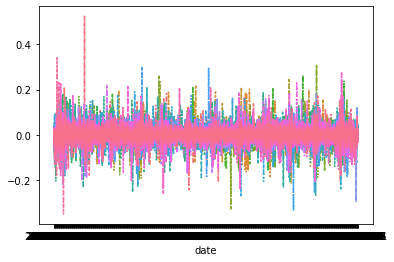

In [137]:
sns.lineplot(data = company_returns, legend = False)
plt.show()

In [138]:
company_details.shape

(495, 5)

In [139]:
company_returns.shape

(754, 487)

### 

## Save results to CSV

In [140]:
company_details.to_csv('company_details.csv')
company_returns.to_csv('company_returns.csv')

In [142]:
company_details.isnull().sum().sum()

0

### 

## Isolate returns in 2019 for use in a trading example

In [148]:
company_returns_2019 = company_returns_all.loc['2019-01-02':'2019-12-31']
company_returns_2019.to_csv('company_returns_2019.csv')

In [149]:
company_prices.to_csv('company_prices_all.csv')